# ASSIGNMENT DATA SCIENCE - PART 1
## Problem statement
Our road networks are equipped with various sensors that measure traffic. ANPR (Automatic Number Plate Recognition) cameras monitor the road and use character recognition algorithms to detect and read license plates of vehicles. Inductive counting loops on the other hand, are placed under the road surface and can detect vehicles passing over them.

In this particular case, the ANPR camera **CPT-C-0002.1** and the inductive counting loop **01A** are located on the same road segment close to each other. This means that we expect these two sensors to produce identical information about the traffic they observe.

The goal of this exercise is to make an analysis in order to demonstrate that (1) the two sensors work fine, or (2) one sensor is working properly and the other not, or (3) both sensors produce erroneous results. The analysis should be focused on the vehicle counts provided by the two sensors, but speed information is also provided and can be used.

Make use of Python, its libraries and this Jupyter notebook to help you out and visualise your findings. The Jupyter notebook will be used to discuss your analysis, used logic and conclusions with members of the data science team. Every additional bit of useful information about the data is welcome and can be discussed.

We wish you the best of luck! If you have any questions, please use the following email address: bruno.cornelis@macq.eu




## Librairies utiles

In [127]:
from google.colab import drive  #mount the drive
from IPython.display import Image
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

## Montage du drive

In [128]:
drive.mount('/content/drive/')
# Chemin vers les fichier csv de donnée
PATH =  '/content/drive/My Drive/Colab Notebooks/2024/internship/'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Structure of the data
### Counting loop (*pboc_data_rv.csv*)

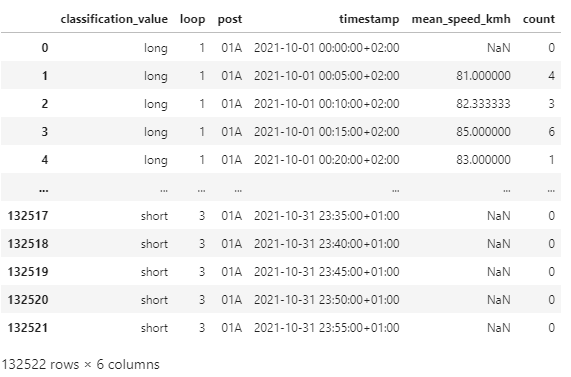

In [3]:
Image(PATH+'images/img_data_pboc_rv.png', width=1000, height=500)

**Features**:
- **classification_value**: classification of the detected vehicle. "short", "medium", "long" represent the length of the vehicle.
- **loop**: id of the loop placed on a single lane of the road. There is one loop on each lane of the road.
- **post**: unique id of the counting post containing the different loops.
- **timestamp**: time of the observation. *Important:* The data is aggregated every 5 minutes.
- **mean_speed_kmh**: average speed of the vehicles detected in km/h.
- **count**: count of the vehicles.

**Explanation for the second row of the Data Frame**:  
There are 4 long vehicles detected by loop 1 of post 01A between 00:05 and 00:10. The average speed of those 4 vehicles equals 81 km/h.  

### ANPR camera (*pfic_data_rv.csv*)

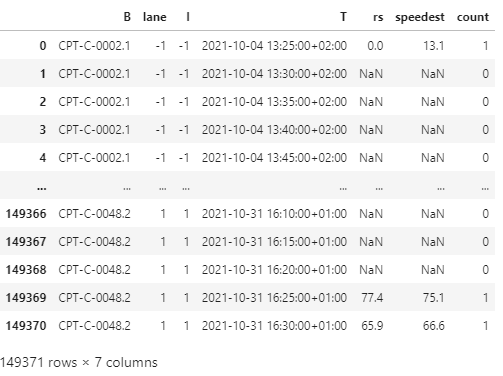

In [ ]:
Image(PATH+'images/img_data_pfic_rv.png', width=1000, height=500)

**Features**:
- **B**: unique ID of a camera
- **lane**: id of the lane observed by the camera (-1:unknown, 1:lane1, 2:lane2). *Be careful:* this camera does not observe traffic on the fastest lane. We don't know if 1 or 2 is the lane in the middle.
- **l**: classification of the vehicle made by the camera (-1:unknown, 0:short vehicle, 1:long vehicle).
- **T**: time of the observation. The data is aggregated every 5 minutes.
- **rs**: average speed returned by the radar fixed to the camera in km/h.
- **speedest**: speed estimation from the camera in km/h.
- **count**: count of the vehicles.

**Explanation of the last row of the Data Frame**:  
There is 1 long vehicle detected by camera CPT-C-0048.2 on lane 1 between 16:30 and 16:35. The average speed is 65.9 km/h from the radar and 66.6 from the camera

## Chargement des fichiers de données

In [169]:
dataset_pboc_data_rv = pd.read_csv(PATH + "pboc_data_rv.csv")
dataset_pfic_data_rv = pd.read_csv(PATH + "pfic_data_rv.csv")

## Visualisation des données

In [181]:
dataset_pfic_data_rv

,B,lane,l,T,rs,speedest,count
0,CPT-C-0002.1,-1,-1,2021-10-04 11:25:00,0.0,13.1,1
1,CPT-C-0002.1,-1,-1,2021-10-04 11:30:00,NaN,NaN,0
2,CPT-C-0002.1,-1,-1,2021-10-04 11:35:00,NaN,NaN,0
3,CPT-C-0002.1,-1,-1,2021-10-04 11:40:00,NaN,NaN,0
4,CPT-C-0002.1,-1,-1,2021-10-04 11:45:00,NaN,NaN,0
...,...,...,...,...,...,...,...
149366,CPT-C-0048.2,1,1,2021-10-31 15:10:00,NaN,NaN,0
149367,CPT-C-0048.2,1,1,2021-10-31 15:15:00,NaN,NaN,0
149368,CPT-C-0048.2,1,1,2021-10-31 15:20:00,NaN,NaN,0
149369,CPT-C-0048.2,1,1,2021-10-31 15:25:00,77.4,75.1,1


In [214]:
dataset_pfic_data_rv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79039 entries, 0 to 79038
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   B         79039 non-null  object        
 1   lane      79039 non-null  int64         
 2   l         79039 non-null  int64         
 3   T         79039 non-null  datetime64[ns]
 4   rs        46879 non-null  float64       
 5   speedest  46879 non-null  float64       
 6   count     79039 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 4.8+ MB


In [180]:
dataset_pboc_data_rv

,classification_value,loop,post,timestamp,mean_speed_kmh,count
0,long,1,01A,2021-09-30 22:00:00,NaN,0
1,long,1,01A,2021-09-30 22:05:00,81.000000,4
2,long,1,01A,2021-09-30 22:10:00,82.333333,3
3,long,1,01A,2021-09-30 22:15:00,85.000000,6
4,long,1,01A,2021-09-30 22:20:00,83.000000,1
...,...,...,...,...,...,...
132517,short,3,01A,2021-10-31 22:35:00,NaN,0
132518,short,3,01A,2021-10-31 22:40:00,NaN,0
132519,short,3,01A,2021-10-31 22:45:00,NaN,0
132520,short,3,01A,2021-10-31 22:50:00,NaN,0


In [215]:
dataset_pboc_data_rv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80460 entries, 0 to 132521
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   classification_value  80460 non-null  object        
 1   loop                  80460 non-null  int64         
 2   post                  80460 non-null  object        
 3   timestamp             80460 non-null  datetime64[ns]
 4   mean_speed_kmh        31563 non-null  float64       
 5   count                 80460 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 4.3+ MB


## Transformation des dates pour faciliter leur gestion avec python

### Conversion vers le type datetime et suppression le l'info utc inule.

In [178]:
dataset_pfic_data_rv["T"] = pd.to_datetime(dataset_pfic_data_rv["T"], exact=True ,utc=True)
dataset_pfic_data_rv['T'] = dataset_pfic_data_rv['T'].dt.tz_localize(None)

dataset_pboc_data_rv["timestamp"] = pd.to_datetime(dataset_pboc_data_rv["timestamp"], exact=True, utc=True)
dataset_pboc_data_rv['timestamp'] = dataset_pboc_data_rv['timestamp'].dt.tz_localize(None)


## Filtrage des données pour ne considérer que les numéros de caméras qui nous intéressent.

In [183]:
dataset_pboc_data_rv = dataset_pboc_data_rv[dataset_pboc_data_rv['post'] == '01A']
dataset_pboc_data_rv

,classification_value,loop,post,timestamp,mean_speed_kmh,count
0,long,1,01A,2021-09-30 22:00:00,NaN,0
1,long,1,01A,2021-09-30 22:05:00,81.000000,4
2,long,1,01A,2021-09-30 22:10:00,82.333333,3
3,long,1,01A,2021-09-30 22:15:00,85.000000,6
4,long,1,01A,2021-09-30 22:20:00,83.000000,1
...,...,...,...,...,...,...
132517,short,3,01A,2021-10-31 22:35:00,NaN,0
132518,short,3,01A,2021-10-31 22:40:00,NaN,0
132519,short,3,01A,2021-10-31 22:45:00,NaN,0
132520,short,3,01A,2021-10-31 22:50:00,NaN,0


In [184]:
dataset_pfic_data_rv = dataset_pfic_data_rv[dataset_pfic_data_rv["B"] == "CPT-C-0002.1"]
dataset_pfic_data_rv

,B,lane,l,T,rs,speedest,count
0,CPT-C-0002.1,-1,-1,2021-10-04 11:25:00,0.0,13.1,1
1,CPT-C-0002.1,-1,-1,2021-10-04 11:30:00,NaN,NaN,0
2,CPT-C-0002.1,-1,-1,2021-10-04 11:35:00,NaN,NaN,0
3,CPT-C-0002.1,-1,-1,2021-10-04 11:40:00,NaN,NaN,0
4,CPT-C-0002.1,-1,-1,2021-10-04 11:45:00,NaN,NaN,0
...,...,...,...,...,...,...,...
79034,CPT-C-0002.1,2,1,2021-10-31 20:30:00,NaN,NaN,0
79035,CPT-C-0002.1,2,1,2021-10-31 20:35:00,NaN,NaN,0
79036,CPT-C-0002.1,2,1,2021-10-31 20:40:00,NaN,NaN,0
79037,CPT-C-0002.1,2,1,2021-10-31 20:45:00,NaN,NaN,0


In [188]:
dataset_pfic_data_rv[dataset_pfic_data_rv["T"] == datetime.datetime(2021, 9, 30, 22, 00, 00)]

,B,lane,l,T,rs,speedest,count
25457,CPT-C-0002.1,1,-1,2021-09-30 22:00:00,118.700000,-1.000000,1
34390,CPT-C-0002.1,1,0,2021-09-30 22:00:00,111.804000,111.804000,25
43330,CPT-C-0002.1,1,1,2021-09-30 22:00:00,91.675000,92.250000,4
52269,CPT-C-0002.1,2,-1,2021-09-30 22:00:00,115.766667,-1.000000,3
61209,CPT-C-0002.1,2,0,2021-09-30 22:00:00,121.955556,122.944444,9


In [190]:
dataset_pboc_data_rv[dataset_pboc_data_rv["timestamp"] == datetime.datetime(2021, 9, 30, 22, 00, 00)]

,classification_value,loop,post,timestamp,mean_speed_kmh,count
0,long,1,01A,2021-09-30 22:00:00,NaN,0
17617,long,2,01A,2021-09-30 22:00:00,NaN,0
35234,long,3,01A,2021-09-30 22:00:00,NaN,0
44174,medium,1,01A,2021-09-30 22:00:00,NaN,0
61791,medium,2,01A,2021-09-30 22:00:00,NaN,0
79408,medium,3,01A,2021-09-30 22:00:00,NaN,0
88348,short,1,01A,2021-09-30 22:00:00,97.800,5
105965,short,2,01A,2021-09-30 22:00:00,118.125,8
123582,short,3,01A,2021-09-30 22:00:00,NaN,0


## counting loop 01A

In [204]:
dataframe=dataset_pboc_data_rv.copy()

Text(0.5, 0, 'Date')

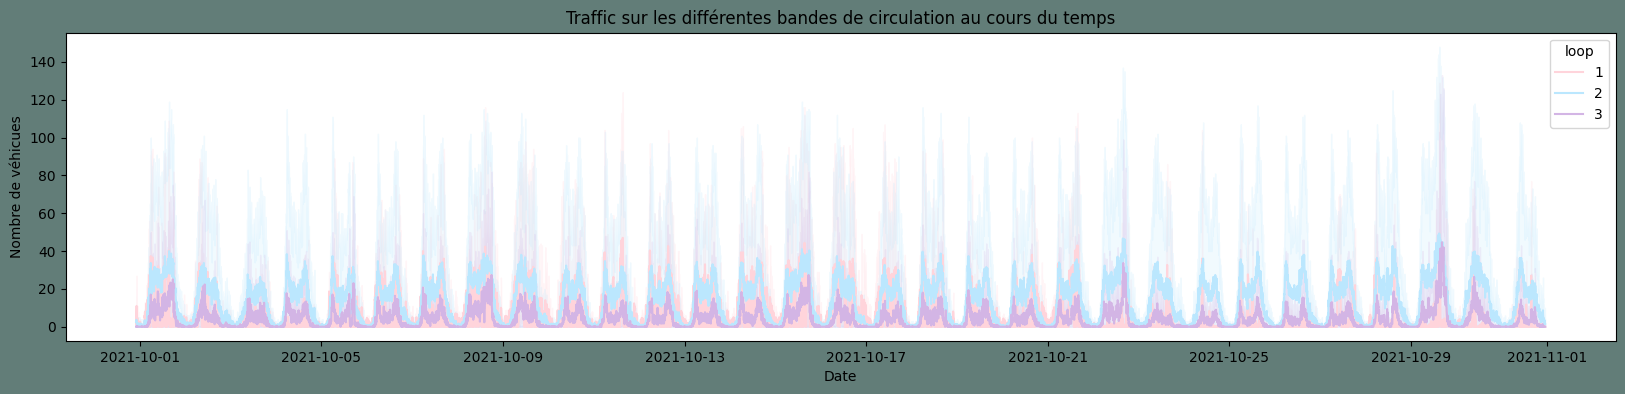

In [192]:
colors = [ "#FFD4DB","#BBE7FE","#D3B5E5"]
plt.figure(figsize=(20,4),facecolor="#627D78")
Time_series=sns.lineplot(x=dataframe['timestamp'],y="count",data=dataframe, hue="loop", palette=colors)
Time_series.set_title("Traffic sur les différentes bandes de circulation au cours du temps")
Time_series.set_ylabel("Nombre de véhicues")
Time_series.set_xlabel("Date")

## Remarques :


*   Le counting loop 01A semble, en générale, detecter plus de véhicule via la loop 2.
*   Élément La fréquence du nombre de véhicule donne un paterne qui se répète.

* Donne une vue global et non détaillée.



## Feature Engineering

### Division de la feature timestamp pour mieux comprendre les données

Visualiser le nombre de véhicule par années et par mois n'avait pas de sens étant donné que les données fournies ne s'étendent que du 30/9/2021 au 31/10/2021.

In [205]:
# Ajout de features
dataframe["Date_no"] = dataframe['timestamp'].dt.day
dataframe["Hour"] = dataframe['timestamp'].dt.hour
dataframe["Day"] = dataframe.timestamp.dt.strftime("%A")
dataframe.head()

,classification_value,loop,post,timestamp,mean_speed_kmh,count,Date_no,Hour,Day
0,long,1,01A,2021-09-30 22:00:00,NaN,0,30,22,Thursday
1,long,1,01A,2021-09-30 22:05:00,81.000000,4,30,22,Thursday
2,long,1,01A,2021-09-30 22:10:00,82.333333,3,30,22,Thursday
3,long,1,01A,2021-09-30 22:15:00,85.000000,6,30,22,Thursday
4,long,1,01A,2021-09-30 22:20:00,83.000000,1,30,22,Thursday


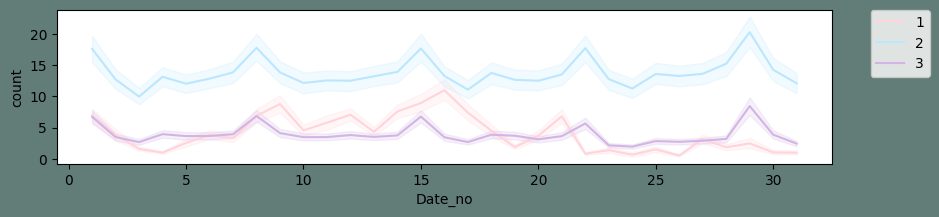

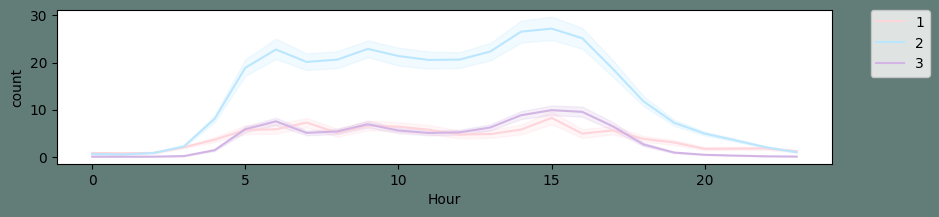

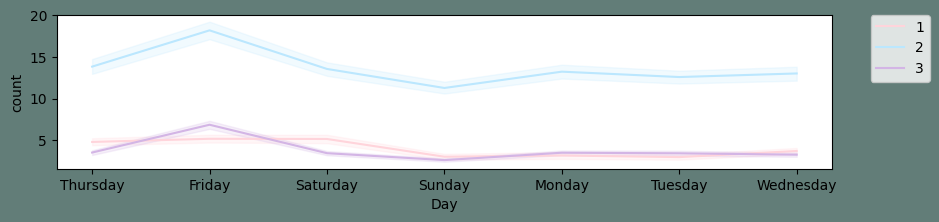

In [206]:
new_features = ["Date_no", "Hour", "Day"]

for i in new_features:
    plt.figure(figsize=(10,2),facecolor="#627D78")
    ax=sns.lineplot(x=dataframe[i],y="count",data=dataframe, hue="loop", palette=colors )
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## ANPR camera (pfic_data_rv)

In [208]:
dataframe2 = dataset_pfic_data_rv.copy()


Text(0.5, 0, 'Date')

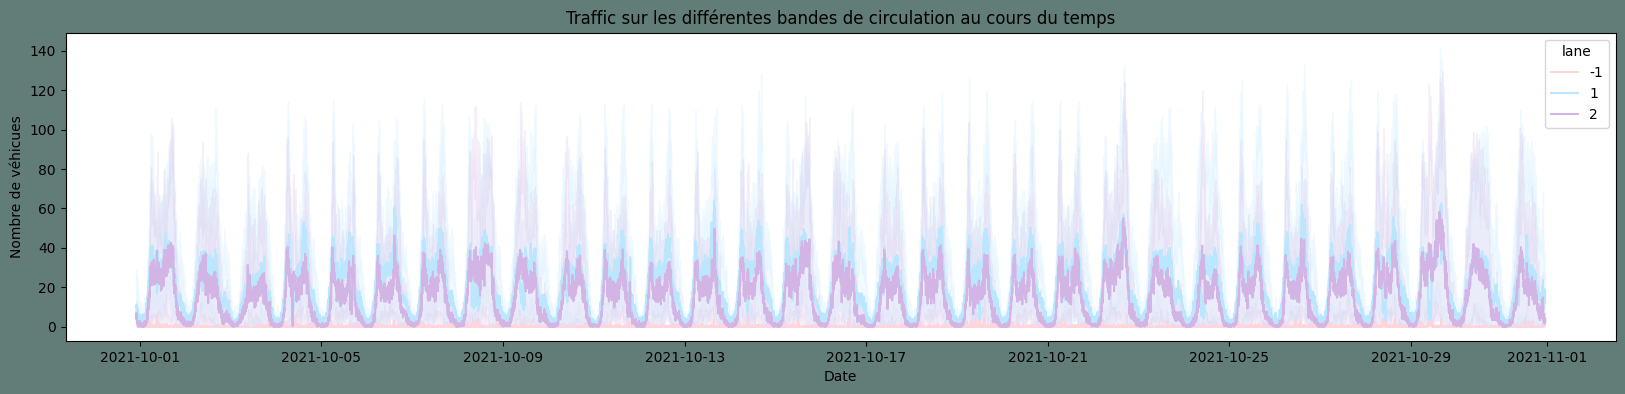

In [211]:
# Let's plot the Timeseries
colors = [ "#FFD4DB","#BBE7FE","#D3B5E5"]
plt.figure(figsize=(20,4),facecolor="#627D78")
Time_series=sns.lineplot(x=dataframe2['T'],y="count",data=dataframe2, hue="lane", palette=colors)
Time_series.set_title("Traffic sur les différentes bandes de circulation au cours du temps")
Time_series.set_ylabel("Nombre de véhicues")
Time_series.set_xlabel("Date")

In [217]:
# Ajout de features
dataframe2["Date_no"] = dataframe2['T'].dt.day
dataframe2["Hour"] = dataframe2['T'].dt.hour
dataframe2["Day"] = dataframe2['T'].dt.strftime("%A")
dataframe2.head()

,B,lane,l,T,rs,speedest,count,Date_no,Hour,Day
0,CPT-C-0002.1,-1,-1,2021-10-04 11:25:00,0.0,13.1,1,4,11,Monday
1,CPT-C-0002.1,-1,-1,2021-10-04 11:30:00,NaN,NaN,0,4,11,Monday
2,CPT-C-0002.1,-1,-1,2021-10-04 11:35:00,NaN,NaN,0,4,11,Monday
3,CPT-C-0002.1,-1,-1,2021-10-04 11:40:00,NaN,NaN,0,4,11,Monday
4,CPT-C-0002.1,-1,-1,2021-10-04 11:45:00,NaN,NaN,0,4,11,Monday


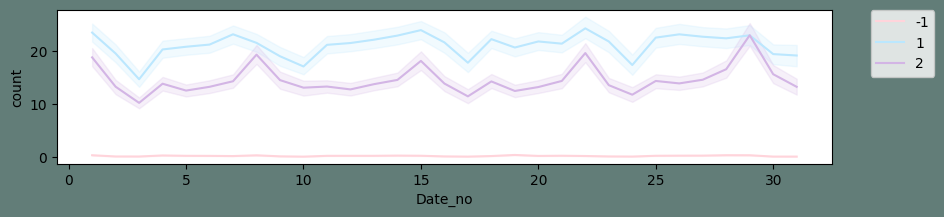

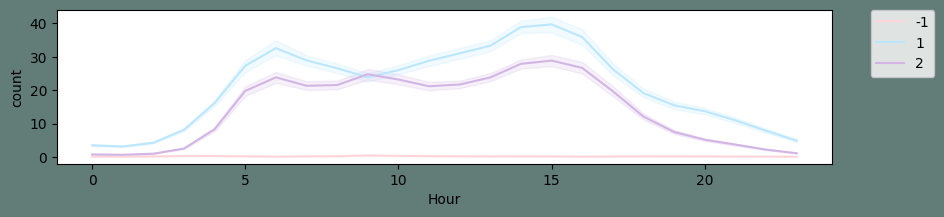

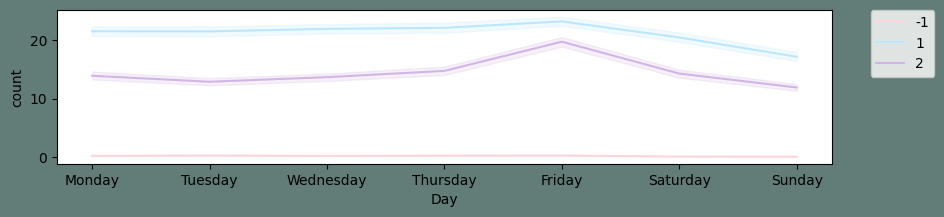

In [221]:
new_features = ["Date_no", "Hour", "Day"]

for i in new_features:
    plt.figure(figsize=(10,2),facecolor="#627D78")
    ax=sns.lineplot(x=dataframe2[i],y="count",data=dataframe2, hue="lane", palette=colors )
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [220]:
dataframe2[dataframe2['count'] > 10]

,B,lane,l,T,rs,speedest,count,Date_no,Hour,Day
21876,CPT-C-0002.1,-1,1,2021-10-19 11:45:00,0.000000,-1.000000,11,19,11,Tuesday
25546,CPT-C-0002.1,1,-1,2021-10-01 05:25:00,118.940000,-1.000000,15,1,5,Friday
25549,CPT-C-0002.1,1,-1,2021-10-01 05:40:00,127.585714,-1.185714,14,1,5,Friday
25554,CPT-C-0002.1,1,-1,2021-10-01 06:05:00,122.516667,-1.216667,12,1,6,Friday
25556,CPT-C-0002.1,1,-1,2021-10-01 06:15:00,114.741667,-1.433333,12,1,6,Friday
...,...,...,...,...,...,...,...,...,...,...
78364,CPT-C-0002.1,2,1,2021-10-29 12:40:00,107.438462,108.469231,13,29,12,Friday
78379,CPT-C-0002.1,2,1,2021-10-29 13:55:00,92.700000,117.158333,12,29,13,Friday
78609,CPT-C-0002.1,2,1,2021-10-30 09:05:00,101.966667,109.600000,12,30,9,Saturday
78610,CPT-C-0002.1,2,1,2021-10-30 09:10:00,96.863636,117.327273,11,30,9,Saturday
